In [1]:
#importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
# from imblearn.pipeline import Pipeline
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import shap

import warnings
warnings.filterwarnings('ignore')

In [2]:
#ler csv

#stats
stats_ger = pd.read_csv("rolling_avg/stats_avg_ger.csv")
stats_ita = pd.read_csv("rolling_avg/stats_avg_ita.csv")
stats_eng = pd.read_csv("rolling_avg/stats_avg_eng.csv")
stats_fra = pd.read_csv("rolling_avg/stats_avg_fra.csv")
stats_spa = pd.read_csv("rolling_avg/stats_avg_spa.csv")
stats_eur = pd.read_csv("rolling_avg/stats_avg_eur.csv")
stats_cup = pd.read_csv("rolling_avg/stats_avg_cup.csv")

#nets
nets_ger = pd.read_csv("rolling_avg/net_avg_ger.csv")
nets_ita = pd.read_csv("rolling_avg/net_avg_ita.csv")
nets_eng = pd.read_csv("rolling_avg/net_avg_eng.csv")
nets_fra = pd.read_csv("rolling_avg/net_avg_fra.csv")
nets_spa = pd.read_csv("rolling_avg/net_avg_spa.csv")
nets_eur = pd.read_csv("rolling_avg/net_avg_eur.csv")
nets_cup = pd.read_csv("rolling_avg/net_avg_cup.csv")

In [3]:
#junta stats com nets
ger = stats_ger.merge(nets_ger, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
ita = stats_ita.merge(nets_ita, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
eng = stats_eng.merge(nets_eng, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
fra = stats_fra.merge(nets_fra, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
spa = stats_spa.merge(nets_spa, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
eur = stats_eur.merge(nets_eur, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
cup = stats_cup.merge(nets_cup, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])

In [4]:
df = pd.concat([ger, ita, eng, fra, spa, eur, cup], ignore_index=True)

In [159]:
df["month"] = df['date'].dt.month

AttributeError: Can only use .dt accessor with datetimelike values

In [166]:
# df["date"] = pd.to_datetime(df["date"])
df.groupby('tournament')['date'].max()

tournament
England                  September 9, 2017 at 4:00:00 PM GMT+2
European_Championship                2016-07-01 21:00:00-02:00
France                   September 9, 2017 at 8:00:00 PM GMT+2
Germany                  September 9, 2017 at 6:30:00 PM GMT+2
Italy                    September 9, 2017 at 6:00:00 PM GMT+2
Spain                    September 9, 2017 at 8:45:00 PM GMT+2
World_Cup                            2018-07-15 17:00:00-02:00
Name: date, dtype: object

In [164]:
df["date"].dt.strftime('%Y-%m-%d')

AttributeError: Can only use .dt accessor with datetimelike values

In [101]:
df.groupby('tournament').count()

,matchID,team1_ID,team2_ID,date,winner,avg_gk_saves_T1,avg_red_card_T1,avg_yellow_card_T1,avg_assists_T1,avg_shots_T1,...,avg_max_eigenvector_centrality_T2,avg_avg_clustering_T2,avg_std_clustering_T2,avg_min_clustering_T2,avg_max_clustering_T2,avg_avg_shortest_path_T2,avg_mean_centroid_y_T2,avg_std_centroid_y_T2,avg_mean_centroid_x_T2,avg_std_centroid_x_T2
tournament,,,,,,,,,,,,,,,,,,,,,
England,231,231,231,231,231,231,231,231,231,231,...,231,231,231,231,231,231,231,231,231,231
European_Championship,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
France,230,230,230,230,230,230,230,230,230,230,...,230,230,230,230,230,230,230,230,230,230
Germany,179,179,179,179,179,179,179,179,179,179,...,179,179,179,179,179,179,179,179,179,179
Italy,250,250,250,250,250,250,250,250,250,250,...,250,250,250,250,250,250,250,250,250,250
Spain,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
World_Cup,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


In [32]:
#Separando dados e target
X = df.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y = df['winner'].astype('int')
col_names = X.columns
idx = df['matchID']

#Normalizando os dados
XScaled = StandardScaler().fit_transform(X)

#Separando treino e teste
X_train, X_test, y_train, y_test = train_test_split(XScaled,
                                                    y.values,
                                                    stratify= y.values,
                                                    test_size=0.3,
                                                    random_state=42)


# Separado por tempo

In [5]:
#nets por tempo
nets_ger_t = pd.read_csv("rolling_avg/net_avg_ger_half.csv")
nets_ita_t = pd.read_csv("rolling_avg/net_avg_ita_half.csv")
nets_eng_t = pd.read_csv("rolling_avg/net_avg_eng_half.csv")
nets_fra_t = pd.read_csv("rolling_avg/net_avg_fra_half.csv")
nets_spa_t = pd.read_csv("rolling_avg/net_avg_spa_half.csv")
nets_eur_t = pd.read_csv("rolling_avg/net_avg_eur_half.csv")
nets_cup_t = pd.read_csv("rolling_avg/net_avg_cup_half.csv")

In [6]:
#junta stats com nets
ger_t = stats_ger.merge(nets_ger_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
ita_t = stats_ita.merge(nets_ita_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
eng_t = stats_eng.merge(nets_eng_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
fra_t = stats_fra.merge(nets_fra_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
spa_t = stats_spa.merge(nets_spa_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
eur_t = stats_eur.merge(nets_eur_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])
cup_t = stats_cup.merge(nets_cup_t, how='inner', on=['matchID','team1_ID', 'team2_ID', 'tournament', 'date', 'winner'])

In [7]:
df_t = pd.concat([ger_t, ita_t, eng_t, fra_t, spa_t, eur_t, cup_t], ignore_index=True)

In [8]:
df_t.shape

(1143, 134)

In [10]:
#Separando dados e target
X_t = df_t.drop(['winner', 'matchID', 'team1_ID', 'team2_ID', 'tournament', 'date'],axis=1)
y_t = df_t['winner'].astype('int')
col_names = X_t.columns
idx_t = df_t['matchID']

#Normalizando os dados
XScaled_t = StandardScaler().fit_transform(X_t)

#Separando treino e teste
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(XScaled_t,
                                                    y_t.values,
                                                    stratify= y_t.values,
                                                    test_size=0.3,
                                                    random_state=42)


# Modelagem

## Setup

In [11]:
def feature_selection(data, threshold):   
    
    #removendo features com 0 de variância
    selector = VarianceThreshold()
    selector.fit_transform(data)
    df_var = data.loc[:, selector.get_support()]
    print(f"{len(data.columns) - len(df_var.columns)} colunas removidas com VarianceThreshold(0)")
    
    #removendo features com correlação alta
    corr = df_var.corr()
    columns = np.full((corr.shape[0],), True, dtype=bool)
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_var.columns[columns]
    df_corr = df_var[selected_columns]    
    print(f"{len(df_var.columns) - len(df_corr.columns)} colunas removidas com correlação > |{threshold}|")
    
    return df_corr

In [12]:
#Métricas de avaliação
def evaluation_metrics(clf,test_x, test_y, pred_y, ax_1, ax_2):
    accuracy = accuracy_score(test_y, pred_y)
    precision = precision_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y)
    f1 = f1_score(test_y, pred_y)
        
    plot_precision_recall_curve(clf, test_x, test_y, ax=ax_1)
    plot_roc_curve(clf, test_x, test_y, ax=ax_2)
    
    return accuracy, precision, recall, f1

In [34]:
def logistic_regression(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para logistic regression
           
    #Define Parameter Space for Optimization
    space = {
        'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
        'penalty': hp.choice('penalty', ['l1', 'l2']),
        'max_iter': hp.quniform('max_iter', 100, 700, 100),
        'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
        'class_weight' : hp.choice('class_weight', ['balanced', None])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=5, scoring='f1', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=10, 
        trials=trials
    )

    print("Logistic Regression - Best: {}".format(best))
    
    logi = LogisticRegression(
        C=[0.001, 0.01, 0.1, 1, 10, 100, 1000][best['C']],
        penalty=['l1', 'l2'][best['penalty']], 
        solver=['liblinear', 'saga'][best['solver']], 
        max_iter=best['max_iter'], 
        class_weight=['balanced', None][best['class_weight']])

    return logi

In [35]:
def random_forest(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para Random Forest

    #Define Parameter Space for Optimization
    space = {
        "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
        "max_depth": hp.quniform("max_depth", 2, 24, 2),
        "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
        "criterion": hp.choice("criterion", ["gini", "entropy"]),
        "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
        "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
        "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
        "bootstrap": hp.choice("bootstrap", [True, False])
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        model = RandomForestClassifier(**params, n_jobs=-1)
        f1 = cross_val_score(model, train_x, train_y, cv = 10, scoring='accuracy', error_score='raise').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print(" Random Forest - Best: {}".format(best))


    rf = RandomForestClassifier(
        n_estimators=[100, 200, 300, 400,500][3],
        max_depth=best['max_depth'],
        max_features=['auto', 'sqrt', 'log2'][best['max_features']],
        criterion=["gini", "entropy"][best['criterion']],
        min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
        min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
        random_state=42,
        class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
        bootstrap=[True, False][best['bootstrap']],
        n_jobs = -1)

    return rf

In [36]:
def xgboosting(train_x, train_y):
    #Achando melhores hiperparâmetros com hyperopt para XGBoosting

    #Define Parameter Space for Optimization
    space = {
    'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
    'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
    'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
    'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
    }

    #Defining a Function to Minimize (Objective Function)
    def hyperparameter_tuning(params):
        clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
        f1 = cross_val_score(clf, train_x, train_y, cv=10, scoring='accuracy').mean()
        
        return {"loss": -f1, "status": STATUS_OK}

    # Fine Tune the Model
    trials = Trials()

    best = fmin(
        fn=hyperparameter_tuning,
        space = space, 
        algo=tpe.suggest, 
        max_evals=20, 
        trials=trials
    )
    print("XGBoosting - Best: {}".format(best))

    xgb = XGBClassifier(
        learning_rate=best['learning_rate'],
        n_estimators=range(50, 400, 10)[best['n_estimators']],
        max_depth=range(5, 15, 1)[best['max_depth']],
        min_child_weight=best['min_child_weight'],
        gamma=best['gamma'],
        subsample=best['subsample'],
        colsample_bytree=best['colsample_bytree'],
        objective= 'binary:logistic',
        scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

    return xgb

In [39]:
def testa_modelos(train_x, train_y, test_x, test_y):
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))

    logi = logistic_regression(train_x, train_y)
    rf = random_forest(train_x, train_y)
    xgb = xgboosting(train_x, train_y)

    for clf, name in [(logi, 'LogisticRegression'),
                      (rf, 'RandomForest'),
                      (xgb, 'XGBClassifier')]:
        
        cv = cross_val_score(clf,train_x,train_y, cv = 10 , scoring='accuracy')
        CrossValMean = cv.mean()
        CrossValSTD = cv.std()
        print("")
        print(f"{name}:")
        print(f"CrossVal (mean/std): {100*CrossValMean:.3f}% / {100*CrossValSTD:.3f}%")
        
        clf.fit(train_x, train_y)
        y_pred = clf.predict(test_x)

        accuracy, precision, recall, f1 = evaluation_metrics(clf, test_x, test_y, y_pred, ax1, ax2)
        print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
    
    ax1.legend(loc="right")
    ax1.set_title('Precision-Recall curve')
    
    ax2.legend(loc="right")
    ax2.set_title('ROC AUC curve')

## Por jogo inteiro

In [67]:
df_sel = feature_selection(X, 0.8)

0 colunas removidas com VarianceThreshold(0)
32 colunas removidas com correlação > |0.8|


100%|██████████| 10/10 [00:24<00:00,  2.45s/trial, best loss: -0.7628517932622803]
Logistic Regression - Best: {'C': 3, 'class_weight': 1, 'max_iter': 400.0, 'penalty': 0, 'solver': 0}
100%|██████████| 20/20 [01:27<00:00,  4.36s/trial, best loss: -0.72875]
 Random Forest - Best: {'bootstrap': 1, 'class_weight': 0, 'criterion': 1, 'max_depth': 18.0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 2, 'n_estimators': 0}
100%|██████████| 20/20 [00:42<00:00,  2.12s/trial, best loss: -0.685] 
XGBoosting - Best: {'colsample_bytree': 0.27, 'gamma': 0.01, 'learning_rate': 0.21, 'max_depth': 0, 'min_child_weight': 7.0, 'n_estimators': 29, 'scale_pos_weight': 14, 'subsample': 0.9500000000000001}

name:
CrossVal (mean/std) :69.250% / 5.568%
accuracy: 66.76% | precision: 70.74% | recall: 77.51% | f1: 73.97%

name:
CrossVal (mean/std) :73.000% / 3.717%
accuracy: 67.64% | precision: 69.76% | recall: 82.78% | f1: 75.71%

name:
CrossVal (mean/std) :68.375% / 4.679%
accuracy: 63.27% | pre

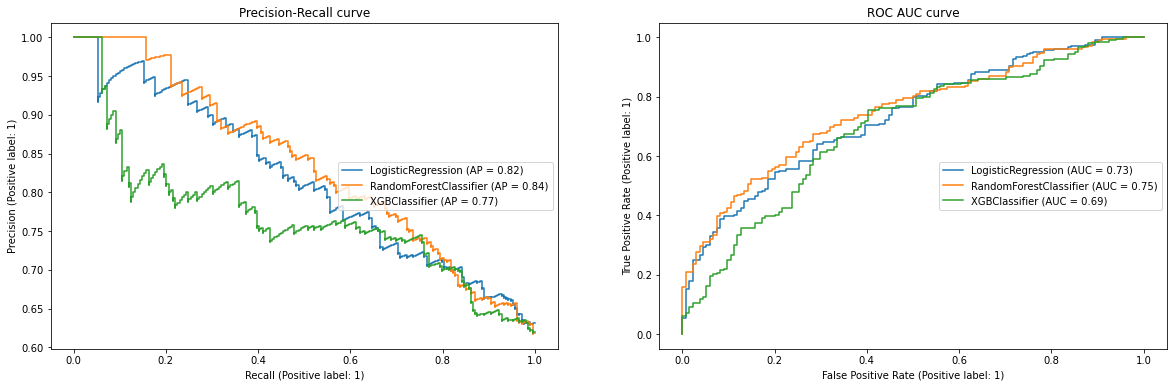

In [38]:
testa_modelos(X_train, y_train, X_test, y_test)

Text(0.5, 0, 'Random Forest Feature Importance')

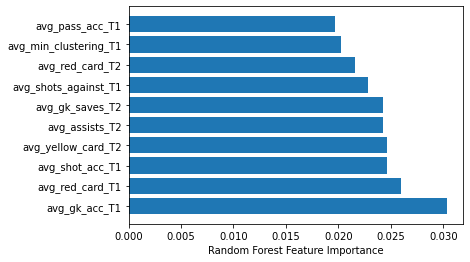

In [109]:
sorted_idx = rf.feature_importances_.argsort()[:-11:-1]
plt.barh(df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

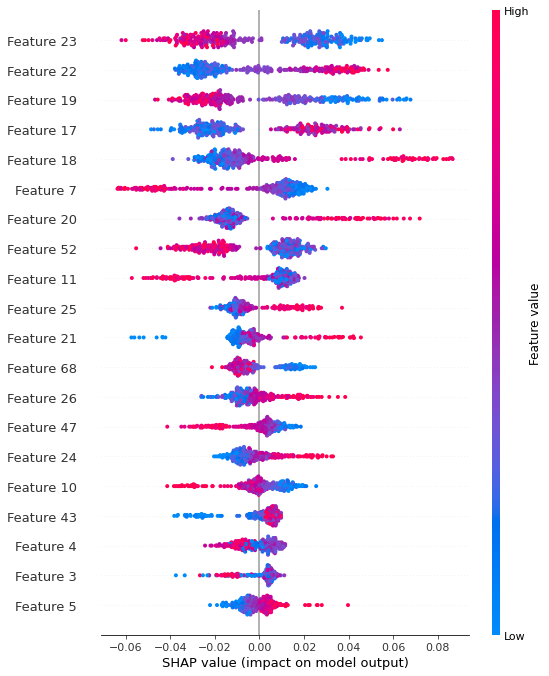

In [110]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[0], X_test, plot_type='dot')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

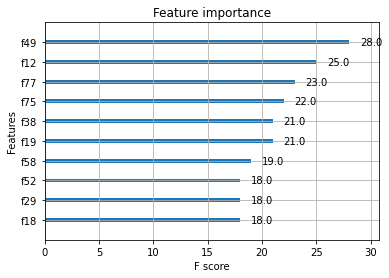

In [112]:
#Feature importance do modelo escolhido
plot_importance(clf, max_num_features = 10)

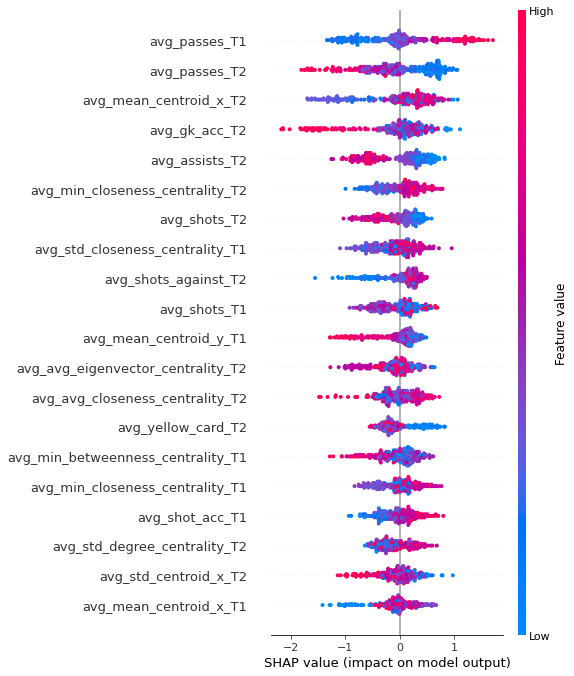

In [75]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

## Por tempo

In [ ]:
df_sel = feature_selection(X_t, 0.8)

0 colunas removidas com VarianceThreshold(0)
32 colunas removidas com correlação > |0.8|


100%|██████████| 10/10 [00:12<00:00,  1.26s/trial, best loss: -0.734252217114239]
Logistic Regression - Best: {'C': 4, 'class_weight': 1, 'max_iter': 100.0, 'penalty': 0, 'solver': 1}
100%|██████████| 20/20 [01:52<00:00,  5.65s/trial, best loss: -0.69875]           
 Random Forest - Best: {'bootstrap': 0, 'class_weight': 2, 'criterion': 0, 'max_depth': 10.0, 'max_features': 2, 'min_samples_leaf': 0, 'min_samples_split': 3, 'n_estimators': 4}
100%|██████████| 20/20 [00:49<00:00,  2.45s/trial, best loss: -0.6875]           
XGBoosting - Best: {'colsample_bytree': 0.33, 'gamma': 0.19, 'learning_rate': 0.37, 'max_depth': 7, 'min_child_weight': 2.0, 'n_estimators': 3, 'scale_pos_weight': 14, 'subsample': 0.7000000000000001}

LogisticRegression:
CrossVal (mean/std): 66.250% / 7.004%
accuracy: 65.01% | precision: 70.51% | recall: 73.21% | f1: 71.83%

RandomForest:
CrossVal (mean/std): 68.875% / 5.713%
accuracy: 69.97% | precision: 69.92% | recall: 89.00% | f1: 78.32%

XGBClassifier:
CrossVal 

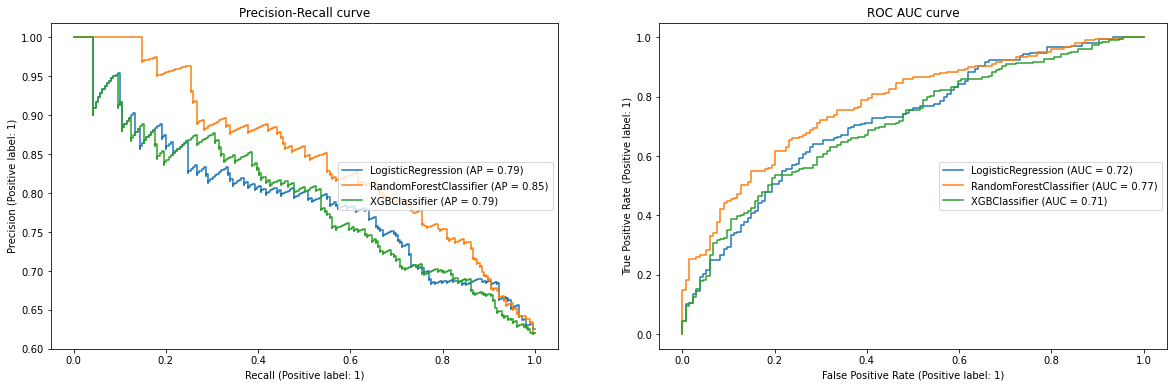

In [40]:
testa_modelos(X_train_t, y_train_t, X_test_t, y_test_t)

In [25]:
#Achando melhores hiperparâmetros com hyperopt para logistic regression
           
#Define Parameter Space for Optimization
space = {
    'C': hp.choice('C', [0.001, 0.01, 0.1, 1, 10, 100, 1000]),
    'penalty': hp.choice('penalty', ['l1', 'l2']),
    'max_iter': hp.quniform('max_iter', 100, 700, 100),
    'solver': hp.choice('solver', ['liblinear', 'saga']), #tirei 'lbfgs' e'sag' pq não funciona com l1
    'class_weight' : hp.choice('class_weight', ['balanced', None])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = LogisticRegression(**params, random_state=42, n_jobs=-1)
    f1 = cross_val_score(clf, X_train_t, y_train_t, cv=10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)

print("Best: {}".format(best))

100%|██████████| 20/20 [01:10<00:00,  3.55s/trial, best loss: -0.6849999999999999]
Best: {'C': 2, 'class_weight': 1, 'max_iter': 500.0, 'penalty': 0, 'solver': 0}


100%|██████████| 20/20 [02:19<00:00,  6.97s/trial, best loss: -0.69875]
Best: {'bootstrap': 1, 'class_weight': 0, 'criterion': 0, 'max_depth': 10.0, 'max_features': 0, 'min_samples_leaf': 0, 'min_samples_split': 2, 'n_estimators': 2}
CrossValMean: 0.7025
CrossValSTD: 0.05910795208768445
accuracy: 70.55% | precision: 72.69% | recall: 82.78% | f1: 77.40%


Text(0.5, 1.0, 'ROC AUC curve')

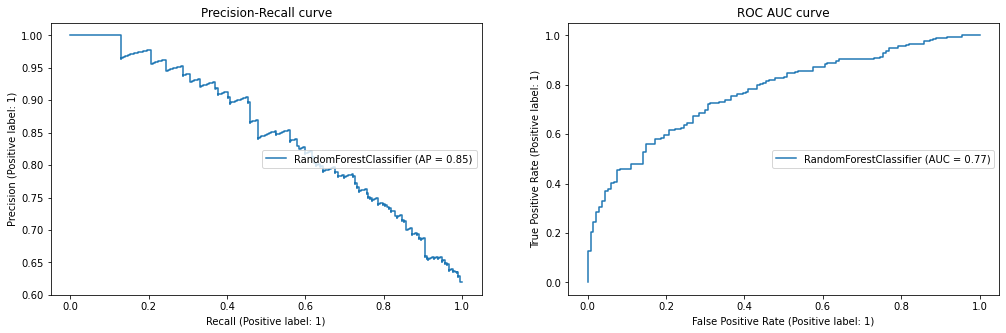

In [17]:
#Achando melhores hiperparâmetros com hyperopt para Random Forest

#Define Parameter Space for Optimization
space = {
    "n_estimators": hp.choice("n_estimators", [100, 200, 300, 400,500]),
    "max_depth": hp.quniform("max_depth", 2, 24, 2),
    "max_features": hp.choice("max_features", ['auto', 'sqrt', 'log2']),
    "criterion": hp.choice("criterion", ["gini", "entropy"]),
    "min_samples_leaf":hp.choice("min_samples_leaf", [1, 2, 3, 4, 5]),
    "min_samples_split":hp.choice("min_samples_split", [2, 3, 4, 5, 6]),
    "class_weight": hp.choice("class_weight", ['balanced', 'balanced_subsample', None]),
    "bootstrap": hp.choice("bootstrap", [True, False])
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    model = RandomForestClassifier(**params, n_jobs=-1)
    f1 = cross_val_score(model, X_train_t, y_train_t, cv = 10, scoring='accuracy', error_score='raise').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)
print("Best: {}".format(best))


rf = RandomForestClassifier(
    n_estimators=[100, 200, 300, 400,500][3],
    max_depth=best['max_depth'],
    max_features=['auto', 'sqrt', 'log2'][best['max_features']],
    criterion=["gini", "entropy"][best['criterion']],
    min_samples_leaf=[1, 2, 3, 4, 5][best['min_samples_leaf']],
    min_samples_split=[2, 3, 4, 5, 6][best['min_samples_split']],
    random_state=42,
    class_weight=['balanced', 'balanced_subsample', None][best['class_weight']],
    bootstrap=[True, False][best['bootstrap']],
    n_jobs = -1)

cv = cross_val_score(rf,X_train_t,y_train_t, cv = 10 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

rf.fit(X_train_t, y_train_t)
y_pred = rf.predict(X_test_t)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(rf, X_test_t ,y_test_t, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

Text(0.5, 0, 'Random Forest Feature Importance')

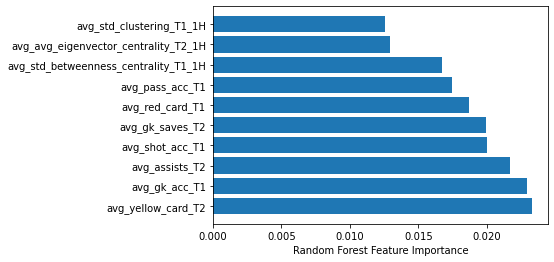

In [19]:
sorted_idx = rf.feature_importances_.argsort()[:-11:-1]
plt.barh(df_t.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

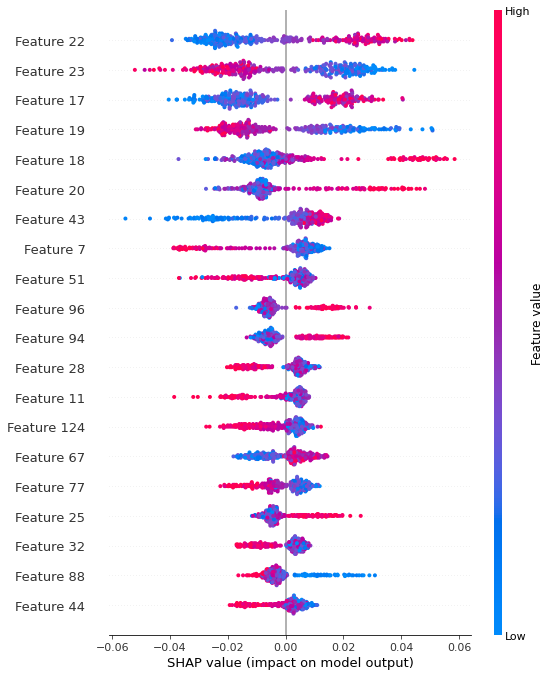

In [20]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test_t)

shap.summary_plot(shap_values[0], X_test_t, plot_type='dot')

100%|██████████| 20/20 [00:56<00:00,  2.85s/trial, best loss: -0.69]
Best: {'colsample_bytree': 0.54, 'gamma': 0.26, 'learning_rate': 0.12, 'max_depth': 2, 'min_child_weight': 4.0, 'n_estimators': 7, 'scale_pos_weight': 2, 'subsample': 0.65}
CrossValMean: 0.675
CrossValSTD: 0.03491060010942237
accuracy: 66.76% | precision: 67.40% | recall: 88.04% | f1: 76.35%


Text(0.5, 1.0, 'ROC AUC curve')

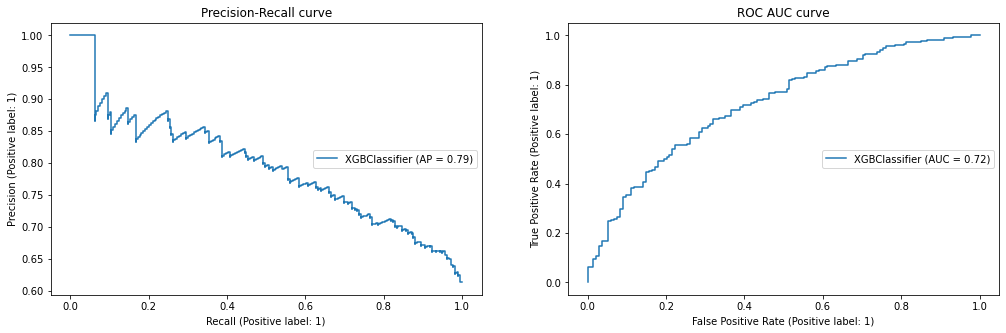

In [21]:
#Achando melhores hiperparâmetros com hyperopt para XGBoosting

#Define Parameter Space for Optimization
space = {
 'max_depth' : hp.choice('max_depth', range(5, 15, 1)),
 'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.01),
 'n_estimators' : hp.choice('n_estimators', range(50, 400, 10)),
 'gamma' : hp.quniform('gamma', 0, 0.30, 0.01),
 'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
 'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
 'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.01),
 'scale_pos_weight' : hp.choice('scale_pos_weight', range(4, 25, 1)),
}

#Defining a Function to Minimize (Objective Function)
def hyperparameter_tuning(params):
    clf = XGBClassifier(**params, random_state=42, verbosity=0, objective= 'binary:logistic', n_jobs=-1)
    f1 = cross_val_score(clf, X_train_t, y_train_t, cv=10, scoring='accuracy').mean()
    
    return {"loss": -f1, "status": STATUS_OK}

# Fine Tune the Model
trials = Trials()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=20, 
    trials=trials
)
print("Best: {}".format(best))

clf = XGBClassifier(
    learning_rate=best['learning_rate'],
    n_estimators=range(50, 400, 10)[best['n_estimators']],
    max_depth=range(5, 15, 1)[best['max_depth']],
    min_child_weight=best['min_child_weight'],
    gamma=best['gamma'],
    subsample=best['subsample'],
    colsample_bytree=best['colsample_bytree'],
    objective= 'binary:logistic',
    scale_pos_weight=range(4, 25, 1)[best['scale_pos_weight']])

cv = cross_val_score(clf,X_train_t,y_train_t, cv = 10 , scoring='accuracy')

CrossValMean = cv.mean()
print("CrossValMean:", CrossValMean)
CrossValSTD = cv.std()
print("CrossValSTD:", CrossValSTD)

clf.fit(X_train_t, y_train_t)
y_pred = clf.predict(X_test_t)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,5))
accuracy, precision, recall, f1 = evaluation_metrics(clf, X_test_t ,y_test_t, y_pred, ax1, ax2)
print(f"accuracy: {100*accuracy:.2f}% | precision: {100*precision:.2f}% | recall: {100*recall:.2f}% | f1: {100*f1:.2f}%")
ax1.legend(loc="right")
ax1.set_title('Precision-Recall curve')

ax2.legend(loc="right")
ax2.set_title('ROC AUC curve')

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

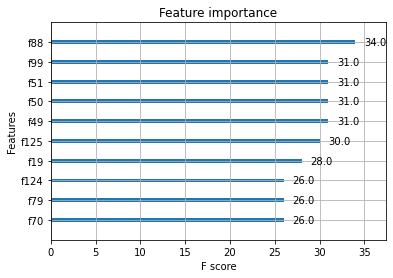

In [22]:
#Feature importance do modelo escolhido
plot_importance(clf, max_num_features = 10)

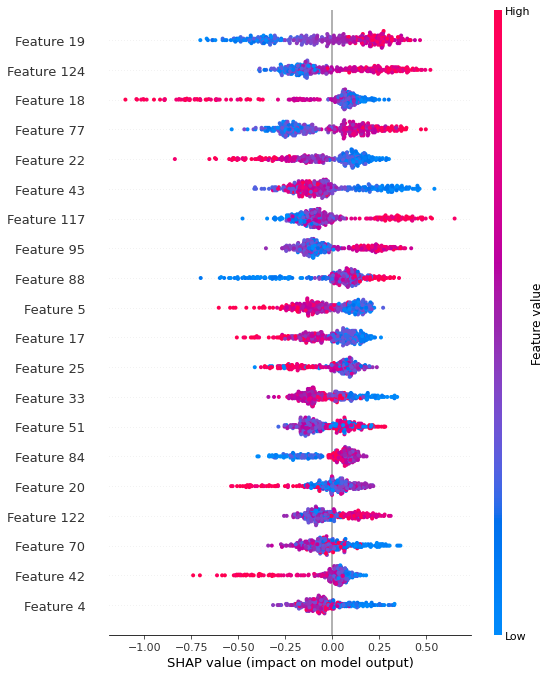

In [23]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test_t)

shap.summary_plot(shap_values, X_test_t)